# Separação treino-teste

In [3]:
from loader_and_preprocess_funcs import *

In [4]:
data =load__data()

In [5]:
top15 = ['Neighborhood','House.Style','Overall.Qual','Full.Bath','Year.Remod.Add','Lot.Area','TotRms.AbvGrd','Fireplaces','Heating.QC','Lot.Frontage',
             'Foundation','Gr.Liv.Area','Kitchen.AbvGr','Open.Porch.SF','Roof.Style','SalePrice']

data = choose_feat(data,top15)

In [6]:
data

,Neighborhood,House.Style,Overall.Qual,Full.Bath,Year.Remod.Add,Lot.Area,TotRms.AbvGrd,Fireplaces,Heating.QC,Lot.Frontage,Foundation,Gr.Liv.Area,Kitchen.AbvGr,Open.Porch.SF,Roof.Style,SalePrice
0,NAmes,1Story,6,1,1960,31770,7,2,Fa,141.0,CBlock,1656,1,62,Hip,215000
1,NAmes,1Story,5,1,1961,11622,5,0,TA,80.0,CBlock,896,1,0,Gable,105000
2,NAmes,1Story,6,1,1958,14267,6,0,TA,81.0,CBlock,1329,1,36,Hip,172000
3,NAmes,1Story,7,2,1968,11160,8,2,Ex,93.0,CBlock,2110,1,0,Hip,244000
4,Gilbert,2Story,5,2,1998,13830,6,1,Gd,74.0,PConc,1629,1,34,Gable,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Mitchel,SLvl,6,1,1984,7937,6,0,TA,37.0,CBlock,1003,1,0,Gable,142500
2926,Mitchel,1Story,5,1,1983,8885,5,0,TA,NaN,CBlock,902,1,0,Gable,131000
2927,Mitchel,SFoyer,5,1,1992,10441,6,0,TA,62.0,PConc,970,1,32,Gable,132000
2928,Mitchel,1Story,5,1,1975,10010,6,1,Gd,77.0,CBlock,1389,1,38,Gable,170000


In [7]:
data = preprocessor(data)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2273 entries, 1 to 2929
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Neighborhood       2273 non-null   object 
 1   House.Style        2273 non-null   object 
 2   Overall.Qual       2273 non-null   object 
 3   Full.Bath          2273 non-null   object 
 4   Year.Remod.Add     2273 non-null   int64  
 5   TotRms.AbvGrd      2273 non-null   object 
 6   Fireplaces         2273 non-null   object 
 7   Heating.QC         2273 non-null   object 
 8   Foundation         2273 non-null   object 
 9   Kitchen.AbvGr      2273 non-null   object 
 10  Roof.Style         2273 non-null   object 
 11  Lot.Area_log       2273 non-null   float64
 12  Lot.Frontage_log   1878 non-null   float64
 13  Gr.Liv.Area_log    2273 non-null   float64
 14  SalePrice_log      2273 non-null   float64
 15  Open.Porch.SF_bin  2273 non-null   object 
dtypes: float64(4), int64(1), obje

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
y = data['SalePrice_log']
X = data.drop(columns=['SalePrice_log'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline Global

In [11]:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,PolynomialFeatures
from sklearn.model_selection import cross_val_score
import optuna
from optuna.visualization import *
import plotly
import optuna
import nbformat 

/Users/jgfaraco/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
num_cols =['Gr.Liv.Area_log','Lot.Area_log','Lot.Frontage_log','Year.Remod.Add']
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
        ('poly', PolynomialFeatures(degree=3, include_bias=False))
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot',  OneHotEncoder(handle_unknown='ignore', sparse_output=False,drop='first')),
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline,      num_cols),
    ('cat', categorical_pipeline,  cat_cols),
],
remainder='passthrough')



# Modelos

ElasticNet, SVM, Trees e ensamble(cpa)

In [13]:
def print_cv_results(model_name, cv_results):
    cv_results = -cv_results

    print(f'{model_name} CV results:')
    print(cv_results)

    mean_rmse = cv_results.mean()
    std_rmse = cv_results.std()

    print(f'RMSE: {mean_rmse:.2f} +/- {std_rmse:.2f}')
    print()

In [14]:
result = pd.DataFrame()

# Dummy model

In [15]:
from sklearn.dummy import DummyRegressor

In [16]:
from sklearn.impute          import SimpleImputer
from sklearn.preprocessing  import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose        import ColumnTransformer
from sklearn.pipeline       import Pipeline
from sklearn.dummy          import DummyRegressor
from sklearn.model_selection import cross_val_score

def objective(trial):
    strategy     = trial.suggest_categorical(
        'strategy',
        ['mean', 'median', 'constant']
    )
    if strategy == 'constant':
        constant_val = trial.suggest_float('constant_val', 0.0, 1.0)
    use_scaler  = trial.suggest_categorical('use_scaler', [False, True])
    if use_scaler:
        with_mean = trial.suggest_categorical('with_mean', [True, False])
        with_std  = trial.suggest_categorical('with_std',  [True, False])
    else:
        with_mean = False
        with_std  = False

    poly_degree = trial.suggest_int('poly_degree', 1, 5)
    num_steps = [('imputer', SimpleImputer(strategy='mean'))]
    if use_scaler:
        num_steps.append((
            'scaler',
            StandardScaler(with_mean=with_mean, with_std=with_std)
        ))
    num_steps.append((
        'poly',
        PolynomialFeatures(degree=poly_degree, include_bias=False)
    ))
    numeric_pipeline = Pipeline(num_steps)

    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot',  OneHotEncoder(handle_unknown='ignore',
                                  sparse_output=False,
                                  drop='first')),
    ])

    preprocessor = ColumnTransformer(
        [
            ('num', numeric_pipeline, num_cols),
            ('cat', categorical_pipeline, cat_cols),
        ],
        remainder='passthrough'
    )

    dummy_kwargs = {'strategy': strategy}
    if strategy == 'constant':
        dummy_kwargs['constant'] = constant_val

    model = Pipeline([
        ('preproc', preprocessor),
        ('dummy',  DummyRegressor(**dummy_kwargs)),
    ])

    neg_mse = cross_val_score(
        model,
        X_train, y_train,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    ).mean()

    return neg_mse


In [17]:
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=42)) 

[I 2025-05-17 10:22:12,294] A new study created in memory with name: no-name-89ef9e68-3259-4832-bcc3-befcff6ecbfd


In [18]:
study.optimize(objective, n_trials=100)

[I 2025-05-17 10:22:18,081] Trial 0 finished with value: -0.024529403559009882 and parameters: {'strategy': 'median', 'use_scaler': False, 'poly_degree': 1}. Best is trial 0 with value: -0.024529403559009882.
[I 2025-05-17 10:22:18,923] Trial 1 finished with value: -0.024529403559009882 and parameters: {'strategy': 'median', 'use_scaler': False, 'poly_degree': 5}. Best is trial 0 with value: -0.024529403559009882.
[I 2025-05-17 10:22:19,768] Trial 2 finished with value: -0.024290639236509086 and parameters: {'strategy': 'mean', 'use_scaler': True, 'with_mean': True, 'with_std': False, 'poly_degree': 1}. Best is trial 2 with value: -0.024290639236509086.
[I 2025-05-17 10:22:20,620] Trial 3 finished with value: -19.97385203085658 and parameters: {'strategy': 'constant', 'constant_val': 0.7851759613930136, 'use_scaler': True, 'with_mean': True, 'with_std': True, 'poly_degree': 1}. Best is trial 2 with value: -0.024290639236509086.
[I 2025-05-17 10:22:20,685] Trial 4 finished with value: -

In [19]:
optuna.visualization.plot_optimization_history(study)

In [20]:
best_params = study.best_params 
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'strategy': 'mean', 'use_scaler': True, 'with_mean': True, 'with_std': False, 'poly_degree': 1}


In [21]:
optuna.visualization.plot_slice(study, params=['strategy','use_scaler','poly_degree','with_std','with_mean'])

In [22]:
optuna.visualization.plot_param_importances(study)

In [23]:
best_strat = best_params['strategy']


In [24]:
numeric_pipeline_dummy = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
        ('poly', PolynomialFeatures(degree=1, include_bias=False)),
        ('scaler', StandardScaler(with_mean=True,with_std=False))
])

categorical_pipeline_dummy = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot',  OneHotEncoder(handle_unknown='ignore', sparse_output=False,drop='first')),
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline_dummy,      num_cols),
    ('cat', categorical_pipeline_dummy,  cat_cols),
],
remainder='passthrough')

dummy = Pipeline([
    ('prepoc',preprocessor),
        ('dummy', DummyRegressor(
            strategy=best_strat
        )),
    
])

In [25]:
dummy_reg_cv = cross_val_score(
        dummy, X_train, y_train,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
print_cv_results('Dummy Regressor',dummy_reg_cv)

Dummy Regressor CV results:
[0.02432599 0.02459076 0.02582598 0.02384896 0.0228615 ]
RMSE: 0.02 +/- 0.00



In [26]:

result['Dummy'] = dummy_reg_cv

# Linear Model 

In [27]:
from sklearn.linear_model import LinearRegression



In [28]:
def objective(trial):
    fit_intercept = trial.suggest_categorical('fit_intercept', [False, True])
    use_scaler  = trial.suggest_categorical('use_scaler', [False, True])
    if use_scaler:
        with_mean = trial.suggest_categorical('with_mean', [True, False])
        with_std  = trial.suggest_categorical('with_std',  [True, False])
    else:
        with_mean = False
        with_std  = False

    poly_degree = trial.suggest_int('poly_degree', 1, 5)
    num_steps = [('imputer', SimpleImputer(strategy='mean'))]
    if use_scaler:
        num_steps.append((
            'scaler',
            StandardScaler(with_mean=with_mean, with_std=with_std)
        ))
    num_steps.append((
        'poly',
        PolynomialFeatures(degree=poly_degree, include_bias=False)
    ))
    numeric_pipeline = Pipeline(num_steps)

    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot',  OneHotEncoder(handle_unknown='ignore',
                                  sparse_output=False,
                                  drop='first')),
    ])

    preprocessor = ColumnTransformer(
        [
            ('num', numeric_pipeline, num_cols),
            ('cat', categorical_pipeline, cat_cols),
        ],
        remainder='passthrough'
    )

    model = Pipeline([
        ('preproc', preprocessor),
        ('linear', LinearRegression(fit_intercept=fit_intercept)),
    ])

    neg_mse = cross_val_score(
        model,
        X_train, y_train,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    ).mean()

    return neg_mse

In [29]:
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=42)) 

[I 2025-05-17 10:22:26,653] A new study created in memory with name: no-name-35c728e6-6188-4404-86e0-8e6b431c8c7c


In [30]:
study.optimize(objective, n_trials=100)

[I 2025-05-17 10:22:26,722] Trial 0 finished with value: -0.00297418192849084 and parameters: {'fit_intercept': True, 'use_scaler': False, 'poly_degree': 1}. Best is trial 0 with value: -0.00297418192849084.
[I 2025-05-17 10:22:26,799] Trial 1 finished with value: -0.006949901960131823 and parameters: {'fit_intercept': False, 'use_scaler': False, 'poly_degree': 4}. Best is trial 0 with value: -0.00297418192849084.
[I 2025-05-17 10:22:26,855] Trial 2 finished with value: -0.00297418192849084 and parameters: {'fit_intercept': True, 'use_scaler': False, 'poly_degree': 1}. Best is trial 0 with value: -0.00297418192849084.
[I 2025-05-17 10:22:26,923] Trial 3 finished with value: -0.002900251376377368 and parameters: {'fit_intercept': True, 'use_scaler': False, 'poly_degree': 2}. Best is trial 3 with value: -0.002900251376377368.
[I 2025-05-17 10:22:27,005] Trial 4 finished with value: -0.0029234658241886298 and parameters: {'fit_intercept': False, 'use_scaler': True, 'with_mean': False, 'wi

In [31]:
optuna.visualization.plot_optimization_history(study)

In [32]:
best_params = study.best_params 
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'fit_intercept': False, 'use_scaler': False, 'poly_degree': 2}


In [33]:
optuna.visualization.plot_slice(study, params=['fit_intercept','use_scaler','poly_degree'])

In [34]:
optuna.visualization.plot_param_importances(study)

In [35]:
numeric_pipeline_linear = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
])

categorical_pipeline_linear = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot',  OneHotEncoder(handle_unknown='ignore', sparse_output=False,drop='first')),
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline_linear,      num_cols),
    ('cat', categorical_pipeline_linear,  cat_cols),
],
remainder='passthrough')

lin_reg = Pipeline([
    ('prepoc',preprocessor),
        ('linear', LinearRegression(
            fit_intercept=False
        )),
    
])

In [36]:
lin_cv = cross_val_score(
        lin_reg, X_train, y_train,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
print_cv_results('Linear Regressor',lin_cv)

Linear Regressor CV results:
[0.00289211 0.0030398  0.0030198  0.00252607 0.00301286]
RMSE: 0.00 +/- 0.00



In [37]:
result['LinearReg'] = lin_cv

In [38]:
result 

,Dummy,LinearReg
0,-0.024326,-0.002892
1,-0.024591,-0.003040
2,-0.025826,-0.003020
3,-0.023849,-0.002526
4,-0.022861,-0.003013


# Elastic Net Regressor

In [39]:
import optuna

In [40]:
from sklearn.linear_model import ElasticNet

In [41]:
def objective(trial):
    alpha         = trial.suggest_float('alpha',      1e-3, 100.0, log=True)
    l1_ratio      = trial.suggest_float('l1_ratio',   0.1,   1.0)
    fit_intercept = trial.suggest_categorical('fit_intercept', [False, True])
    max_iter      = trial.suggest_int('max_iter',     1000,  5000)

    use_scaler  = trial.suggest_categorical('use_scaler', [False, True])
    if use_scaler:
        with_mean = trial.suggest_categorical('with_mean', [True, False])
        with_std  = trial.suggest_categorical('with_std',  [True, False])
    else:
        with_mean = False
        with_std  = False

    poly_degree = trial.suggest_int('poly_degree', 1, 5)
    num_steps = [('imputer', SimpleImputer(strategy='mean'))]
    if use_scaler:
        num_steps.append((
            'scaler',
            StandardScaler(with_mean=with_mean, with_std=with_std)
        ))
    num_steps.append((
        'poly',
        PolynomialFeatures(degree=poly_degree, include_bias=False)
    ))
            
    numeric_pipeline = Pipeline(num_steps)

    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot',  OneHotEncoder(handle_unknown='ignore',
                                  sparse_output=False,
                                  drop='first')),
    ])

    preprocessor = ColumnTransformer(
        [
            ('num', numeric_pipeline,      num_cols),
            ('cat', categorical_pipeline,  cat_cols),
        ],
        remainder='passthrough'
    )

    model = Pipeline([
        ('preproc', preprocessor),
        ('est', ElasticNet(
            alpha=alpha,
            l1_ratio=l1_ratio,
            fit_intercept=fit_intercept,
            max_iter=max_iter,
            random_state=42
        )),
    ])

    neg_mse = cross_val_score(
        model, X_train, y_train,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    ).mean()

    return neg_mse



In [42]:
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=42)) 

[I 2025-05-17 10:22:35,381] A new study created in memory with name: no-name-6699033b-2d04-4320-93fd-1795336771dd


In [43]:
study.optimize(objective, n_trials=100)

/Users/jgfaraco/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.947e+00, tolerance: 4.015e+00
  model = cd_fast.enet_coordinate_descent(
/Users/jgfaraco/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.034e+00, tolerance: 4.013e+00
  model = cd_fast.enet_coordinate_descent(
/Users/jgfaraco/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

In [44]:
optuna.visualization.plot_optimization_history(study)

In [45]:
best_params = study.best_params 
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'alpha': 0.001139641416462081, 'l1_ratio': 0.5217945777947136, 'fit_intercept': True, 'max_iter': 1470, 'use_scaler': True, 'with_mean': False, 'with_std': True, 'poly_degree': 5}


In [46]:
optuna.visualization.plot_slice(study, params=['alpha', 'l1_ratio', 'fit_intercept', 'max_iter','use_scaler','poly_degree','with_mean','with_std'])

In [47]:
optuna.visualization.plot_param_importances(study)

In [48]:
best_alpha = best_params['alpha']
best_l1_ratio = best_params['l1_ratio']
best_fit_intercept = best_params['fit_intercept']
best_max_iter = best_params['max_iter']




In [49]:
numeric_pipeline_elastic = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
        ('poly', PolynomialFeatures(degree=5, include_bias=False)),
        ('scaler',StandardScaler(with_mean=False))
])

categorical_pipeline_elastic = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot',  OneHotEncoder(handle_unknown='ignore', sparse_output=False,drop='first')),
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline_elastic,      num_cols),
    ('cat', categorical_pipeline_elastic,  cat_cols),
],
remainder='passthrough')

elastic = Pipeline([
    ('prepoc',preprocessor),
        ('est', ElasticNet(
            alpha=best_alpha,
            l1_ratio=best_l1_ratio,
            fit_intercept=best_fit_intercept,
            max_iter=best_max_iter,
            random_state=42
        )),
    
])

In [105]:
est_cv = cross_val_score(
        elastic, X_train, y_train,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
print_cv_results('Elastic Net Regressor',est_cv)

Elastic Net Regressor CV results:
[0.00345792 0.00345615 0.00348472 0.00292266 0.00306042]
RMSE: 0.00 +/- 0.00



/Users/jgfaraco/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.200e-03, tolerance: 3.475e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jgfaraco/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.695e-03, tolerance: 3.519e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jgfaraco/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

In [51]:
result['ElsticNet'] = est_cv

# Random Forest Regressor

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
def objective(trial): 
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 10, 50) 
    min_samples_split = trial.suggest_int('min_samples_split', 2, 32) 
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 32) 

    num_steps = [
        ('imputer', SimpleImputer(strategy='mean'))
    ]
    poly_degree   = trial.suggest_int('poly_degree',1,3)

    num_steps = [('imputer', SimpleImputer(strategy='mean'))]
    
    num_steps.append(('poly',
                      PolynomialFeatures(degree=poly_degree,
                                         include_bias=False)))
            
    numeric_pipeline = Pipeline(num_steps)

    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot',  OneHotEncoder(handle_unknown='ignore',
                                  sparse_output=False,
                                  drop='first')),
    ])

    preprocessor = ColumnTransformer(
        [
            ('num', numeric_pipeline,      num_cols),
            ('cat', categorical_pipeline,  cat_cols),
        ],
        remainder='passthrough'
    )
    model = Pipeline([
        ('preproc', preprocessor),
        ('randomforest', RandomForestRegressor(
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf,
        random_state=42
        )),
    ])

    neg_mse = cross_val_score(
        model, X_train, y_train,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    ).mean()

    return neg_mse

In [54]:
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=42)) 

[I 2025-05-17 10:23:19,168] A new study created in memory with name: no-name-799538ee-3f99-431b-98d0-603fb74e4d6f


In [55]:
study.optimize(objective, n_trials=100)

[I 2025-05-17 10:23:21,526] Trial 0 finished with value: -0.004594551395352957 and parameters: {'n_estimators': 437, 'max_depth': 48, 'min_samples_split': 24, 'min_samples_leaf': 20, 'poly_degree': 1}. Best is trial 0 with value: -0.004594551395352957.
[I 2025-05-17 10:23:27,445] Trial 1 finished with value: -0.00445005723682228 and parameters: {'n_estimators': 240, 'max_depth': 12, 'min_samples_split': 28, 'min_samples_leaf': 20, 'poly_degree': 3}. Best is trial 1 with value: -0.00445005723682228.
[I 2025-05-17 10:23:28,266] Trial 2 finished with value: -0.004058536747106786 and parameters: {'n_estimators': 118, 'max_depth': 49, 'min_samples_split': 27, 'min_samples_leaf': 7, 'poly_degree': 1}. Best is trial 2 with value: -0.004058536747106786.
[I 2025-05-17 10:23:29,866] Trial 3 finished with value: -0.0043284876421504324 and parameters: {'n_estimators': 265, 'max_depth': 22, 'min_samples_split': 18, 'min_samples_leaf': 14, 'poly_degree': 1}. Best is trial 2 with value: -0.0040585367

In [56]:
optuna.visualization.plot_optimization_history(study)

In [57]:
best_params = study.best_params 
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'n_estimators': 930, 'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 2, 'poly_degree': 1}


In [58]:
optuna.visualization.plot_slice(study, params=['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf','poly_degree'])

In [59]:
optuna.visualization.plot_param_importances(study)

In [60]:
best_n= best_params['n_estimators']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
best_min_samples_leaf = best_params['min_samples_leaf']

In [61]:
numeric_pipeline_random_tree = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
        ('poly', PolynomialFeatures(degree=1, include_bias=False))
])

categorical_pipeline_elastic = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot',  OneHotEncoder(handle_unknown='ignore', sparse_output=False,drop='first')),
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline_elastic,      num_cols),
    ('cat', categorical_pipeline_elastic,  cat_cols),
],
remainder='passthrough')

rforest = Pipeline([
    ('prepoc',preprocessor),
    ('randomforest', RandomForestRegressor(
        n_estimators=best_n, 
        max_depth=best_max_depth, 
        min_samples_split=best_min_samples_split, 
        min_samples_leaf=best_min_samples_leaf,
        random_state=42
        )),
    
])

In [62]:
rforest_cv = cross_val_score(
        rforest, X_train, y_train,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )

In [63]:
print_cv_results('Random Forest Regressor',rforest_cv)

Random Forest Regressor CV results:
[0.00408933 0.00402485 0.00366554 0.00376839 0.00353502]
RMSE: 0.00 +/- 0.00



In [64]:
result['RandomForest'] = rforest_cv

# Avaliando os modelos

In [65]:
result

,Dummy,LinearReg,ElsticNet,RandomForest
0,-0.024326,-0.002892,-0.003458,-0.004089
1,-0.024591,-0.003040,-0.003456,-0.004025
2,-0.025826,-0.003020,-0.003485,-0.003666
3,-0.023849,-0.002526,-0.002923,-0.003768
4,-0.022861,-0.003013,-0.003060,-0.003535


In [67]:
print('Média de NRMSE do Dummy Model', result['Dummy'].mean())
print('Média de NRMSE do Linear model', result['LinearReg'].mean())
print('Média de NRMSE do ElasticNet model', result['ElsticNet'].mean())
print('Média de NNRMSE do RandomForest model', result['RandomForest'].mean())

Média de NRMSE do Dummy Model -0.024290639236509086
Média de NRMSE do Linear model -0.002898128376183294
Média de NRMSE do ElasticNet model -0.0032763714843841206
Média de NNRMSE do RandomForest model -0.003816627344484573


In [68]:
from scipy.stats import ttest_rel

In [69]:


scores_dict = result.to_dict(orient='list')
means = {name: np.mean(vals) for name, vals in scores_dict.items()}
best_name = max(means, key=means.get)
print(f"Melhor modelo: {best_name} (erro médio = {means[best_name]:.4f})\n")

alpha = 0.05
n_models = len(scores_dict) - 1
alpha_corr = alpha / n_models
for name, scores in scores_dict.items():
    if name == best_name:
        continue

    best_scores = scores_dict[best_name]
    other_scores = scores
    stat, p = ttest_rel(best_scores, other_scores)

    delta = means[name] - means[best_name]

    signif = 'SIM' if p < alpha_corr else 'NÃO'
    print(
        f"{name:15s} → Δmédia = {delta:+.4f} | "
        f"p-valor = {p:.4f} | Significativo p < {alpha_corr:.4f}? {signif}"
    )


Melhor modelo: LinearReg (erro médio = -0.0029)

Dummy           → Δmédia = -0.0214 | p-valor = 0.0000 | Significativo p < 0.0167? SIM
ElsticNet       → Δmédia = -0.0004 | p-valor = 0.0125 | Significativo p < 0.0167? SIM
RandomForest    → Δmédia = -0.0009 | p-valor = 0.0032 | Significativo p < 0.0167? SIM


A partir do t-test conseguimos ver que existe uma diferença de desemepenho estatisticamente significativa do modelo de regressão linear comparado com os outros modelos.

Analisando os coeficientes de variação

In [70]:
pct_errors = (10**result['Dummy'] - 1) * 100

cv = pct_errors.std() / pct_errors.mean() * 100

print(f'CV do modelo Dummy: {-cv:.2f}%')

CV do modelo Dummy: 4.33%


In [114]:

neg_mse_log = result['LinearReg']

mse_log = -neg_mse_log

rmse_log = np.sqrt(mse_log)

pct_errors = (10**rmse_log - 1) * 100

cv = pct_errors.std() / pct_errors.mean() * 100

print(f'CV do modelo LinearReg: {cv:.2f}%')
print(f'Erro porcentual médio do modelo LinearReg: {pct_errors.mean():.2f}%')

CV do modelo LinearReg: 4.04%
Erro porcentual médio do modelo LinearReg: 13.19%


In [115]:

neg_mse_log = result['RandomForest']

mse_log = -neg_mse_log

rmse_log = np.sqrt(mse_log)

pct_errors = (10**rmse_log - 1) * 100

cv = pct_errors.std() / pct_errors.mean() * 100

print(f'CV do modelo RandomForest: {cv:.2f}%')
print(f'Erro porcentual médio do modelo RandomForest: {pct_errors.mean():.2f}%')

CV do modelo RandomForest: 3.31%
Erro porcentual médio do modelo RandomForest: 15.28%


In [116]:

neg_mse_log = result['ElsticNet']

mse_log = -neg_mse_log

rmse_log = np.sqrt(mse_log)

pct_errors = (10**rmse_log - 1) * 100

cv = pct_errors.std() / pct_errors.mean() * 100

print(f'CV do modelo ElasticNet: {cv:.2f}%')
print(f'Erro porcentual médio do modelo ElasticNet: {pct_errors.mean():.2f}%')

CV do modelo ElasticNet: 4.35%
Erro porcentual médio do modelo ElasticNet: 14.08%


Portanto, o modelo de regressão linear foi o que melhor desempnhou, apesar de que comparado com o RandomForest, tem um coeficiente de variação um pouco maior

# Análisando o melhor modelo

In [ ]:

from sklearn.metrics import mean_squared_error

lin_model = lin_reg.fit(X_train, y_train)
y_pred_log = lin_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_pred_log, y_test))
pct_errors = (10**rmse - 1) * 100
print(f'Porcentagem de erro no conjunto de teste : {pct_errors:.2f}')


Porcentagem de erro no conjunto de teste : 13.14


In [133]:

from sklearn.pipeline import Pipeline
if isinstance(lin_model, Pipeline):
    lr = lin_model.named_steps['linear']
else:
    lr = lin_model

coefs = lr.coef_

feature_names = X_train.columns
preproc = lin_model.named_steps['prepoc']
feature_names = preproc.get_feature_names_out()
feat_imp = pd.Series(coefs, index=feature_names)
feat_imp = feat_imp.reindex(feat_imp.abs().sort_values(ascending=False).index)

print("Features mais importantes (descendente):")
print(feat_imp.head(10)) 

Features mais importantes (descendente):
num__Gr.Liv.Area_log                    -10.632948
num__Lot.Area_log                         1.596862
num__Gr.Liv.Area_log^2                    0.325527
num__Gr.Liv.Area_log Lot.Frontage_log    -0.260134
cat__Overall.Qual_Greater than 8          0.211201
num__Gr.Liv.Area_log Lot.Area_log         0.189154
cat__Overall.Qual_8                       0.138325
cat__Overall.Qual_7                       0.094104
cat__Neighborhood_StoneBr                 0.078756
cat__Overall.Qual_6                       0.073655
dtype: float64


Analisando as features mais importantes para o modelo, podemos ver que por uma vantagem bem grande, a mais importante é `Gr.Liv.Area_log`, que faz sentido sendo que essa feature representa a soma do tamanho de todos os comodos da casa acima do solo.

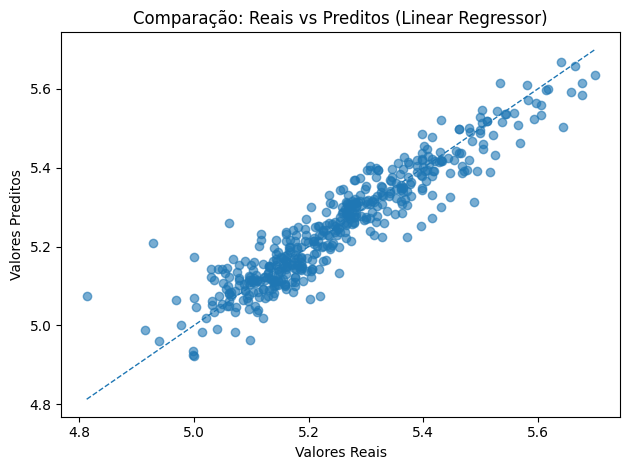

In [123]:
# 5) Plote real × predito
from matplotlib import pyplot as plt
plt.figure()
plt.scatter(y_test, y_pred_log, alpha=0.6)
minv = min(y_test.min(), y_pred_log.min())
maxv = max(y_test.max(), y_pred_log.max())
plt.plot([minv, maxv], [minv, maxv], '--', linewidth=1)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Comparação: Reais vs Preditos (Linear Regressor)")
plt.tight_layout()
plt.show()

Análisando o plot entre os valores reais e os valores preditos pelo meu modelo. Podemos ver que ele tem uma certa dificuldade para valores maix baixos e também para valores mais altos, vamos analisar mais afundo isso 

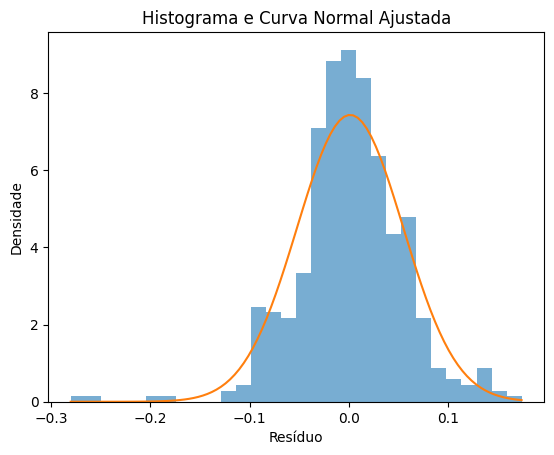

In [178]:

residuals = y_test - y_pred_log

plt.figure()
plt.hist(residuals, bins=30, density=True, alpha=0.6)
mu, sigma = residuals.mean(), residuals.std()
x = np.linspace(residuals.min(), residuals.max(), 100)
plt.plot(x, 1/(sigma * np.sqrt(2*np.pi)) * np.exp(- (x-mu)**2 / (2*sigma**2)))
plt.title("Histograma e Curva Normal Ajustada")
plt.xlabel("Resíduo")
plt.ylabel("Densidade")
plt.show()



- A maioria dos resíduos se concentra em torno do zero, que é exatamente o que a gente queria. Podemos obsevar que a distribuição é quase normal, podemos ver que apesar de estar bem normalizada no meio, ainda temos alguns outliers. Vamos ver esses outliers um pouco melhor


Aqui estamos comparando os resíduos com uma distribuição normal. Podemos ver que a maioria dos resíduos seguem uma distribuição normal, tirando os valores mais baixos que fogem bem da linha(que são os mesmos outliers do histograma), podemos observar também um outlier na parte mais alta dos valores.
Vamos analisar esses outliers

In [ ]:

df_res = X_test.copy().reset_index(drop=True)
df_res['y_true']    = y_test.values
df_res['y_pred']    = y_pred_log
df_res['residual']  = residuals


df_real = df_res.copy()


bottom4_real = df_real.nsmallest(4, 'residual')
top1_real    = df_real.nlargest(1,    'residual')
maiores = pd.concat([top1_real, bottom4_real], axis=0)
print("4 casos com resíduo muito alto (predito >> real) em valores originais:")
print(maiores)


4 casos com resíduo muito alto (predito >> real) em valores originais:
    Neighborhood House.Style Overall.Qual Full.Bath  Year.Remod.Add  \
241      Edwards      1Story            5         1            1999   
125        NAmes      1Story            5         2            1958   
279      Somerst      2Story            7         2            2003   
297      NridgHt      2Story            7         2            2004   
83       OldTown      1.5Fin            5         1            2003   

    TotRms.AbvGrd Fireplaces Heating.QC Foundation Kitchen.AbvGr Roof.Style  \
241             7          0         Ex      PConc             1        Hip   
125             8          0         TA     CBlock             2        Hip   
279             4          0         Ex      PConc             1      Gable   
297             8          1         Ex      PConc             1      Gable   
83              5          0         Ex     CBlock             1      Gable   

     Lot.Area_log  Lot.Fron

In [ ]:

df_real = maiores.copy()

df_real['y_true_real'] = 10**(df_real['y_true'])
df_real['y_pred_real'] = 10**(df_real['y_pred'])

df_real['residual_real'] = df_real['y_true_real'] - df_real['y_pred_real']


print("4 casos com resíduo muito alto (predito >> real) em valores originais:")
print(df_real[['y_true_real','y_pred_real','residual_real']])

4 casos com resíduo muito alto (predito >> real) em valores originais:
     y_true_real    y_pred_real  residual_real
241     167000.0  158081.002325    8918.997675
125     128600.0  129776.508801   -1176.508801
279     139000.0  164657.461072  -25657.461072
297     284000.0  262919.716679   21080.283321
83      114000.0  112237.503796    1762.496204


In [185]:
y_test_real = 10**y_test
y_pred_real = 10**y_pred_log
residuals_real = y_test_real - y_pred_real
print(abs(residuals_real).mean())


17153.02154295468


Analisando as features e os valores reais desses casos que o modelo acaba cometendo erros maiores, podemos tirar a conclusão que em casas menores, de qualidade média e que o ano da última renovação da casa foi em torno de 2000-2005, com valores mais baixos o modelo acaba cometendo erros maiores

# Conclusão

- O modelo alcançou um erro percentual médio de 13 % e um resíduo médio de R$ 17 153 no conjunto de teste, ao prever imóveis na faixa de R$ 100 000 a R$ 500 000. Esses resultados indicam que ele pode ser aplicado em cenários reais — respeitando as limitações descritas no `README.md`.
Em particular, observou-se que o modelo tende a subperformar em casas de menor valor (por volta de R$ 100 000), com qualidade média e última reforma por volta de  2000 e 2005, apresentando aí maiores discrepâncias nas previsões.

- A principal feature na determinação do preço do imóvel é  `Gr.Liv.Area_log`, que faz sentido sendo que essa feature representa a soma do tamanho de todos os comodos da casa acima do solo. Outras que também são importantes são `Lot.Area_log` que representa o tamamnho do lot em metros quadrados e `Overall.Qual`, que é a qualidade da casa

- Próximos passos:  acredito que ainda seja possível achar um modelo melhor, talvez fazer um ensamble de modelos lineares, incluindo outros modelos lineares mais robustos e até o próprio ElasticNet dado que o desempenho dele não foi tão pior que o do modelo linear. Talvez seja até interessante separar um modelo específico para prever valores menores de casas.